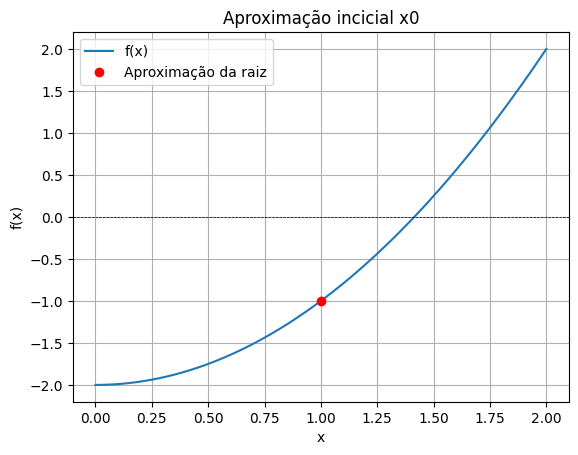

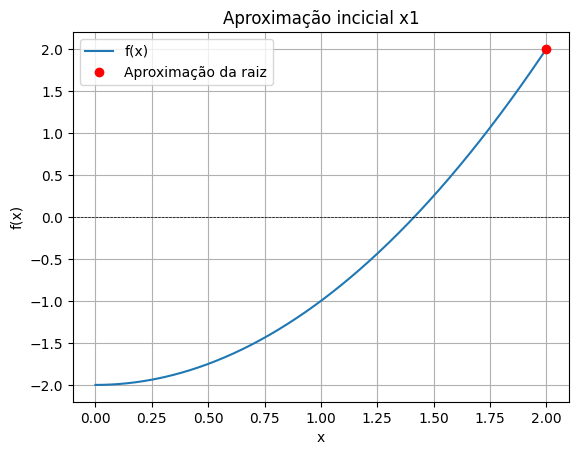

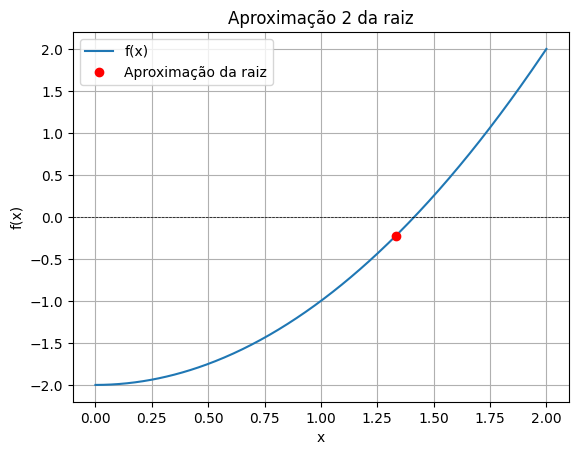

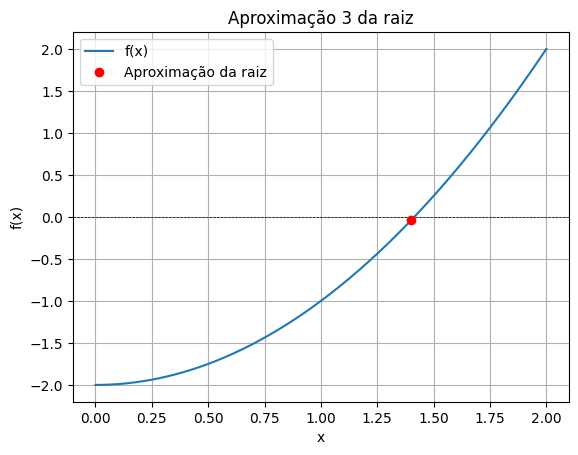

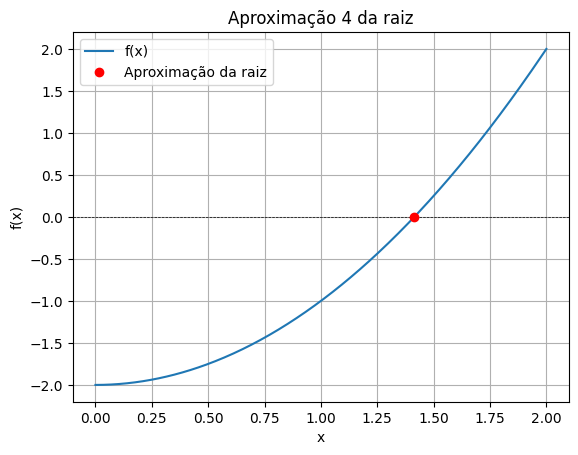

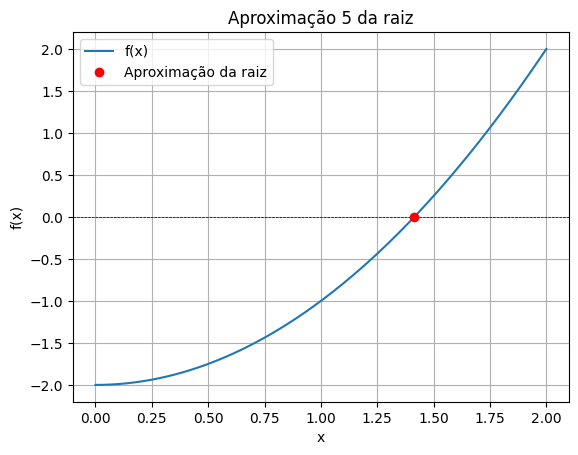

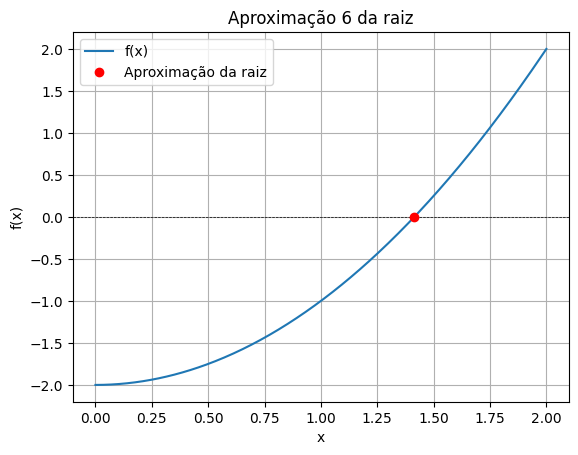

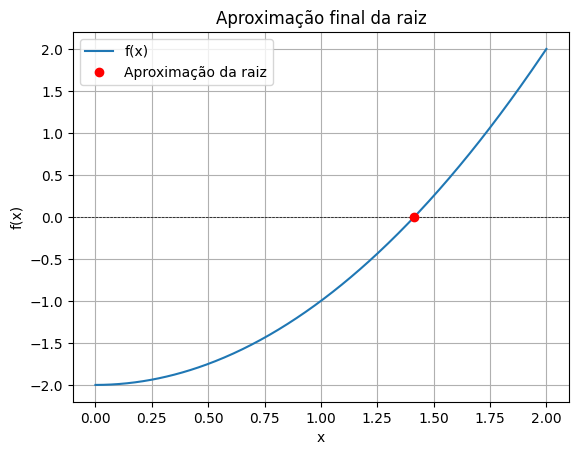

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def secante(f, x0, x1, tol=1e-7, max_iter=100):
    """
    Encontra uma raiz da função f usando o método da secante.

    O método da secante é um método numérico para encontrar raízes de funções que utiliza
    uma aproximação linear baseada em dois pontos iniciais.

    Parâmetros:
    f : função
        A função para a qual se deseja encontrar a raiz.
    x0 : float
        O primeiro ponto inicial.
    x1 : float
        O segundo ponto inicial.
    tol : float
        A tolerância para o critério de parada.
    max_iter : int
        O número máximo de interações permitidas.
    
    Retorna:
    list: Uma lista contendo todas as aproximações geradas durante o processo.
    
    Lança:
        ValueError: Se o número máximo de iterações for atingido sem convergência.
        ZeroDivisionError: Se a diferença entre f(x1) e f(x0) for muito pequena.
    """
    lista_de_aproximacoes = [x0, x1]
    for _ in range(max_iter):
        if abs(f(x1) - f(x0)) < 1e-14:
            raise ValueError("Divisão por zero no método da secante")
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        lista_de_aproximacoes.append(x2)
        if abs(x2 - x1) < tol:
            return lista_de_aproximacoes
        x0, x1 = x1, x2
    raise ValueError("Número máximo de iterações atingido")
    
aproximacoes = secante(lambda x: x**2 - 2, 1, 2)
def plotar_func_e_ponto(f, ponto, x_min, x_max, title):
    x = np.linspace(x_min, x_max, 400)
    y = f(x)
    plt.plot(x, y, label='f(x)')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.plot(ponto, f(ponto), 'ro', label='Aproximação da raiz')
    plt.title(f'{title}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid()
    plt.show()

plotar_func_e_ponto(lambda x: x**2 - 2, aproximacoes[0], 0, 2, "Aproximação incicial x0")
plotar_func_e_ponto(lambda x: x**2 - 2, aproximacoes[1], 0, 2, "Aproximação incicial x1")
for i in range(2, len(aproximacoes)):
    if i == len(aproximacoes) - 1:
        plotar_func_e_ponto(lambda x: x**2 - 2, aproximacoes[i], 0, 2, f"Aproximação final da raiz")
    else:
        plotar_func_e_ponto(lambda x: x**2 - 2, aproximacoes[i], 0, 2, f"Aproximação {i} da raiz")